In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
df = pd.read_csv('survey.csv')
#https://www.kaggle.com/account/login?returnUrl=%2Fosmi%2Fmental-health-in-tech-survey

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
print('Min age: {}'.format(df.Age.min()))
print('Max age: {}'.format(df.Age.max()))

Min age: -1726
Max age: 99999999999


In [5]:
df = df[(df.Age > 0) & (df.Age < 100)]

In [6]:
print('Min age: {}'.format(df.Age.min()))
print('Max age: {}'.format(df.Age.max()))

Min age: 5
Max age: 72


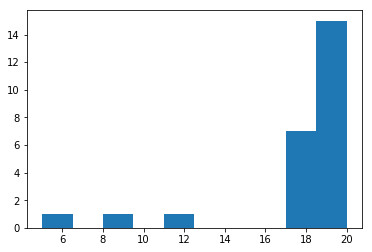

In [7]:
plt.hist(df[df.Age <= 20].Age)
plt.show()

In [8]:
df = df[(df.Age >= 18) & (df.Age < 100)]

In [9]:
print('Min age: {}'.format(df.Age.min()))
print('Max age: {}'.format(df.Age.max()))

Min age: 18
Max age: 72


In [10]:
df.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'], dtype=object)

In [11]:
gender_value_remap = {
                'Female':'Cis-Female',
                'M':'Cis-Male',
                'male':'Cis-Male',
                'Male':'Cis-Male',
                'female':'Cis-Female',
                'm':'Cis-Male',
                'Male-ish':'Cis-Male',
                'maile':'Cis-Male',
                'Trans-female':'Trans-Female',
                'Cis Female':'Cis-Female',
                'F':'Cis-Female',
                'something kinda male?':'Cis-Male',
                'Cis Male':'Cis-Male',
                'Woman':'Cis-Female',
                'f':'Cis-Female',
                'Mal':'Cis-Male',
                'Male (CIS)':'Cis-Male',
                'queer/she/they':'Cis-Female',
                'non-binary':'Non-Binary',
                'Femake':'Cis-Female',
                'woman':'Cis-Female',
                'Make':'Cis-Male',
                'Nah':'Non-Binary',
                'All':'Non-Binary',
                'Enby':'Non-Binary',
                'fluid':'Non-Binary',
                'Genderqueer':'Non-Binary',
                'Female ':'Cis-Female',
                'Androgyne':'Non-Binary',
                'Agender':'Non-Binary',
                'cis-female/femme':'Cis-Female',
                'Guy (-ish) ^_^':'Cis-Male',
                'male leaning androgynous':'Cis-Male',
                'Male ':'Cis-Male',
                'Man':'Cis-Male',
                'Trans woman':'Trans-Female',
                'msle':'Cis-Male',
                'Neuter':'Non-Binary',
                'Female (trans)':'Trans-Female',
                'queer':'Unspecified',
                'Female (cis)':'Cis-Female',
                'Mail':'Cis-Male',
                'cis male':'Cis-Male',
                'A little about you':'Unspecified',
                'Malr':'Cis-Male',
                'p':'Unspecified',
                'femail':'Cis-Female',
                'Cis Man':'Cis-Male',
                'ostensibly male, unsure what that really means':'Cis-Male',
}
df.loc[df['Gender'].isin(gender_value_remap.keys()), 'Gender'] = df['Gender'].map(gender_value_remap)

In [12]:
df.Gender.unique()

array(['Cis-Female', 'Cis-Male', 'Trans-Female', 'Non-Binary',
       'Unspecified'], dtype=object)

In [13]:
df.Gender.value_counts()/len(df)

Cis-Male        0.791367
Cis-Female      0.198241
Non-Binary      0.006395
Trans-Female    0.003197
Unspecified     0.000799
Name: Gender, dtype: float64

In [14]:
df.Gender.unique()

array(['Cis-Female', 'Cis-Male', 'Trans-Female', 'Non-Binary',
       'Unspecified'], dtype=object)

In [15]:
df.Gender.unique()

array(['Cis-Female', 'Cis-Male', 'Trans-Female', 'Non-Binary',
       'Unspecified'], dtype=object)

In [16]:
remap_gender_numeric = {'Cis-Female':0,
                        'Cis-Male':1,
                        'Unspecified':2,
                        'Trans-Female':3,
                        'Non-Binary':4
}
df.Gender = df.Gender.map(remap_gender_numeric)

In [17]:
df.Gender.unique()

array([0, 1, 3, 4, 2])

In [18]:
df.Gender.value_counts()

1    990
0    248
4      8
3      4
2      1
Name: Gender, dtype: int64

In [19]:
remap = {np.NaN:'Unspecified'}
df.loc[df['self_employed'].isin(remap.keys()),'self_employed'] = df['self_employed'].map(remap)
df.fillna('Unspecified', inplace = True)

In [20]:
df.self_employed.value_counts()

No             1091
Yes             142
Unspecified      18
Name: self_employed, dtype: int64

In [21]:
remap = {'Unspecified':'No'}
df.loc[df['self_employed'].isin(remap.keys()),'self_employed'] = df['self_employed'].map(remap)

In [22]:
df.self_employed.value_counts()

No     1109
Yes     142
Name: self_employed, dtype: int64

In [23]:
df.self_employed = df.self_employed.map({'No':0,'Yes':1})

In [24]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,0,United States,IL,0,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Unspecified
1,2014-08-27 11:29:37,44,1,United States,IN,0,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,Unspecified
2,2014-08-27 11:29:44,32,1,Canada,Unspecified,0,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Unspecified
3,2014-08-27 11:29:46,31,1,United Kingdom,Unspecified,0,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Unspecified
4,2014-08-27 11:30:22,31,1,United States,TX,0,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Unspecified


In [25]:
df.Country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand', 'Spain',
       'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina', 'Hungary',
       'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway', 'Thailand',
       'Denmark', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [26]:
len(df[df.Country == 'United States'])/len(df)

0.5963229416466826

In [27]:
df.Country.value_counts()/len(df)

United States             0.596323
United Kingdom            0.147082
Canada                    0.057554
Germany                   0.035971
Netherlands               0.021583
Ireland                   0.021583
Australia                 0.016787
France                    0.010392
India                     0.007994
New Zealand               0.006395
Italy                     0.005596
Switzerland               0.005596
Sweden                    0.005596
Poland                    0.005596
Belgium                   0.004796
Brazil                    0.004796
South Africa              0.004796
Israel                    0.003997
Bulgaria                  0.003197
Singapore                 0.003197
Austria                   0.002398
Mexico                    0.002398
Finland                   0.002398
Russia                    0.002398
Croatia                   0.001599
Greece                    0.001599
Denmark                   0.001599
Portugal                  0.001599
Colombia            

In [28]:
df.Country = pd.factorize(df.Country)[0]

In [29]:
#check which states have the non Cis conforming samples
df[df.Gender > 1].state.value_counts()

Unspecified    6
CA             3
CT             1
MA             1
VA             1
MO             1
Name: state, dtype: int64

In [30]:
df[df.state.isin(df[df.Gender > 1].state.unique())].state.value_counts()

Unspecified    513
CA             138
MA              20
VA              14
MO              12
CT               4
Name: state, dtype: int64

In [31]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [32]:
df.treatment.value_counts()/len(df)

Yes    0.505196
No     0.494804
Name: treatment, dtype: float64

In [33]:
df[df.Gender > 1].treatment.value_counts()/len(df[df.Gender > 1])

Yes    0.846154
No     0.153846
Name: treatment, dtype: float64

In [34]:
df[df.Gender > 1].treatment.value_counts()

Yes    11
No      2
Name: treatment, dtype: int64

In [35]:
#treatment seeking for cis-females
df[df.Gender == 0].treatment.value_counts()

Yes    171
No      77
Name: treatment, dtype: int64

In [36]:
# treatment seeking for cis-males
list(df[df.Gender == 1].treatment.value_counts())

[540, 450]

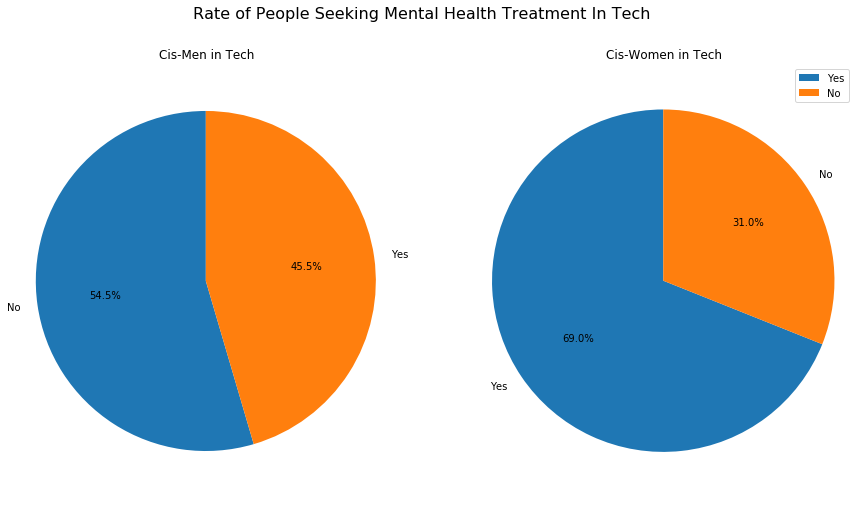

In [37]:


fig1, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
fig1.suptitle("Rate of People Seeking Mental Health Treatment In Tech", fontsize=16)

labels = df[df.Gender == 1].treatment.unique()
sizes = list(df[df.Gender == 1].treatment.value_counts())

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
ax1.set_title('Cis-Men in Tech')

labels = df[df.Gender == 0].treatment.unique()
sizes = list(df[df.Gender == 0].treatment.value_counts())

ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
ax2.set_title('Cis-Women in Tech')
plt.legend()
plt.show()

In [38]:
scipy.stats.ttest_ind(list(df[df.Gender == 1].treatment.value_counts()), 
                      list(df[df.Gender == 0].treatment.value_counts()))

Ttest_indResult(statistic=5.7016228039055745, pvalue=0.029410864955595601)

In [39]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,0,0,IL,0,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Unspecified
1,2014-08-27 11:29:37,44,1,0,IN,0,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,Unspecified
2,2014-08-27 11:29:44,32,1,1,Unspecified,0,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Unspecified
3,2014-08-27 11:29:46,31,1,2,Unspecified,0,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Unspecified
4,2014-08-27 11:30:22,31,1,0,TX,0,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Unspecified


In [40]:
df['state'] = pd.factorize(df.state)[0]

In [41]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,0,0,0,0,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Unspecified
1,2014-08-27 11:29:37,44,1,0,1,0,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,Unspecified
2,2014-08-27 11:29:44,32,1,1,2,0,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Unspecified
3,2014-08-27 11:29:46,31,1,2,2,0,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Unspecified
4,2014-08-27 11:30:22,31,1,0,3,0,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Unspecified


In [42]:
df.family_history.unique()

array(['No', 'Yes'], dtype=object)

In [43]:
df['family_history'] = pd.factorize(df.family_history)[0]


In [44]:
df.treatment.unique()

array(['Yes', 'No'], dtype=object)

In [45]:
df['treatment'] = pd.factorize(df.treatment)[0]

In [46]:
df.work_interfere.unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', 'Unspecified'], dtype=object)

In [47]:
df['work_interfere'] = pd.factorize(df.work_interfere)[0]

In [48]:
df.remote_work.unique()

array(['No', 'Yes'], dtype=object)

In [49]:
df['remote_work'] = pd.factorize(df.remote_work)[0]

In [50]:
df.tech_company.unique()

array(['Yes', 'No'], dtype=object)

In [51]:
df['tech_company'] = pd.factorize(df.tech_company)[0]

In [52]:
df.benefits.unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [53]:
df['benefits'] = pd.factorize(df.benefits)[0]

In [54]:
df.care_options.unique()

array(['Not sure', 'No', 'Yes'], dtype=object)

In [55]:
df['care_options'] = pd.factorize(df.care_options)[0]

In [56]:
df.wellness_program.unique()

array(['No', "Don't know", 'Yes'], dtype=object)

In [57]:
df['wellness_program'] = pd.factorize(df.wellness_program)[0]

In [58]:
df.mental_health_consequence.unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [59]:
df['mental_health_consequence'] = pd.factorize(df.mental_health_consequence)[0]

In [60]:
df.seek_help.unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [61]:
df['seek_help'] = pd.factorize(df.seek_help)[0]

In [62]:
df.anonymity.unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [63]:
df['anonymity'] = pd.factorize(df.anonymity)[0]

In [64]:
df.leave.unique()

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy'], dtype=object)

In [65]:
df['leave'] = pd.factorize(df.leave)[0]

In [66]:
df.phys_health_consequence.unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [67]:
df['phys_health_consequence'] = pd.factorize(df.phys_health_consequence)[0]

In [68]:
df.coworkers.unique()

array(['Some of them', 'No', 'Yes'], dtype=object)

In [69]:
df['coworkers'] = pd.factorize(df.coworkers)[0]

In [70]:
df.supervisor.unique()

array(['Yes', 'No', 'Some of them'], dtype=object)

In [71]:
df['supervisor'] = pd.factorize(df.supervisor)[0]

In [72]:
df.mental_health_interview.unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [73]:
df['mental_health_interview'] = pd.factorize(df.mental_health_interview)[0]

In [74]:
df.phys_health_interview.unique()

array(['Maybe', 'No', 'Yes'], dtype=object)

In [75]:
df['phys_health_interview'] = pd.factorize(df.phys_health_interview)[0]

In [76]:
df.mental_vs_physical.unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [77]:
df['mental_vs_physical'] = pd.factorize(df.mental_vs_physical)[0]

In [78]:
df.obs_consequence.unique()

array(['No', 'Yes'], dtype=object)

In [79]:
df['obs_consequence'] = pd.factorize(df.obs_consequence)[0]

In [80]:
from sklearn import ensemble

In [81]:
X = df.drop(['Timestamp', 'treatment','no_employees','comments'], axis = 1)
Y = df['treatment']

In [106]:
Y.value_counts()

0    632
1    619
Name: treatment, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
Xtrain, Xtest, Ytrain,  Ytest = train_test_split(X, Y, test_size = 0.2)

In [84]:
rfc = ensemble.RandomForestClassifier()

In [85]:
rfc.fit(Xtrain, Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [86]:
Y_ = rfc.predict(Xtest)

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
accuracy_score(Ytest, Y_)

0.78087649402390436

In [89]:
rfc.feature_importances_

array([ 0.08273815,  0.02426263,  0.04291388,  0.05898816,  0.01317405,
        0.06348668,  0.30145243,  0.01865394,  0.01139752,  0.0364596 ,
        0.04890756,  0.02022675,  0.02028377,  0.02117693,  0.04448592,
        0.02994612,  0.01548583,  0.0224768 ,  0.03098375,  0.01713714,
        0.02938401,  0.02973161,  0.01624676])

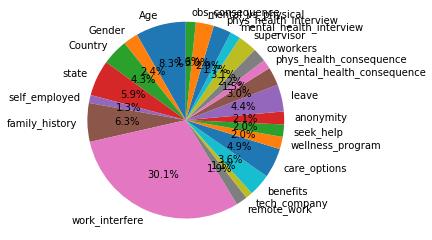

In [90]:
#set lables from features
labels = Xtrain.columns
#retrieve relative importance of features from random forests
sizes = rfc.feature_importances_
#set explode parameters to make the chart look nice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')

plt.show()

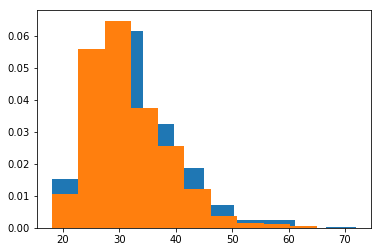

In [134]:
plt.hist(df[df.treatment == 0].Age, normed = True)
plt.hist(df[df.treatment == 1].Age, normed = True)
plt.show()

In [97]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, X, Y, cv = 5)

In [99]:
print(scores.mean())
print(scores)


0.783290740652
[ 0.79681275  0.8247012   0.788       0.772       0.73493976]


In [100]:
X = df.drop(['Timestamp', 'work_interfere','no_employees','comments'], axis = 1)
Y = df['work_interfere']

In [101]:
Xtrain, Xtest, Ytrain,  Ytest = train_test_split(X, Y, test_size = 0.2)
scores = cross_val_score(rfc, X, Y, cv = 5)
print(scores.mean())
print(scores)

0.416337286473
[ 0.43253968  0.43650794  0.436       0.3935743   0.38306452]


In [102]:
df.work_interfere.unique()

array([0, 1, 2, 3, 4])

In [114]:
min([len(df[df.treatment == 0]),len(df[df.treatment == 1])])

619

In [146]:
target_column = 'treatment'
small_cat_count = min([len(df[df[target_column] == 0]),len(df[df[target_column] == 1])])
tempdf = pd.concat([df[df[target_column] == 0].sample(small_cat_count), df[df[target_column] == 1].sample(small_cat_count)])
tempdf = tempdf.sample(frac=1).reset_index(drop=True)
X = tempdf.drop(['Timestamp', target_column,'no_employees','comments'], axis = 1)
Y = tempdf[target_column]
Xtrain, Xtest, Ytrain,  Ytest = train_test_split(X, Y, test_size = 0.2)
scores = cross_val_score(rfc, X, Y, cv = 5)
print(scores.mean())
print(scores)
print(scores.std())

0.759218463152
[ 0.76612903  0.76612903  0.83064516  0.71774194  0.71544715]
0.0420321661319
